# Prophet 예제

In [125]:
%pip install prophet

     --------------------------------------- 13.3/13.3 MB 40.9 MB/s eta 0:00:00
     ------------------------------------- 932.3/932.3 kB 61.5 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


16:22:08 - cmdstanpy - INFO - Chain [1] start processing
16:22:08 - cmdstanpy - INFO - Chain [1] done processing


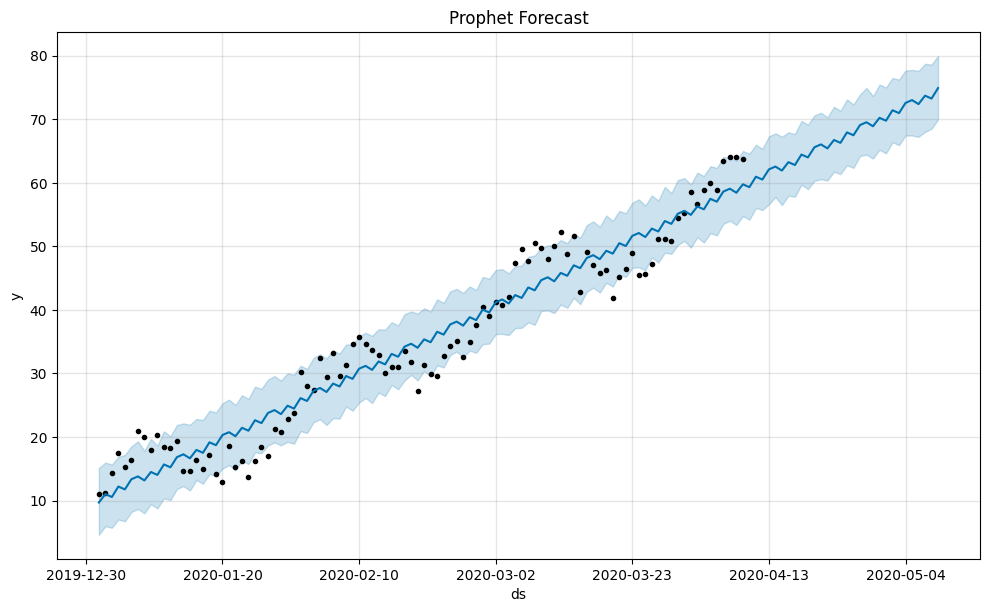

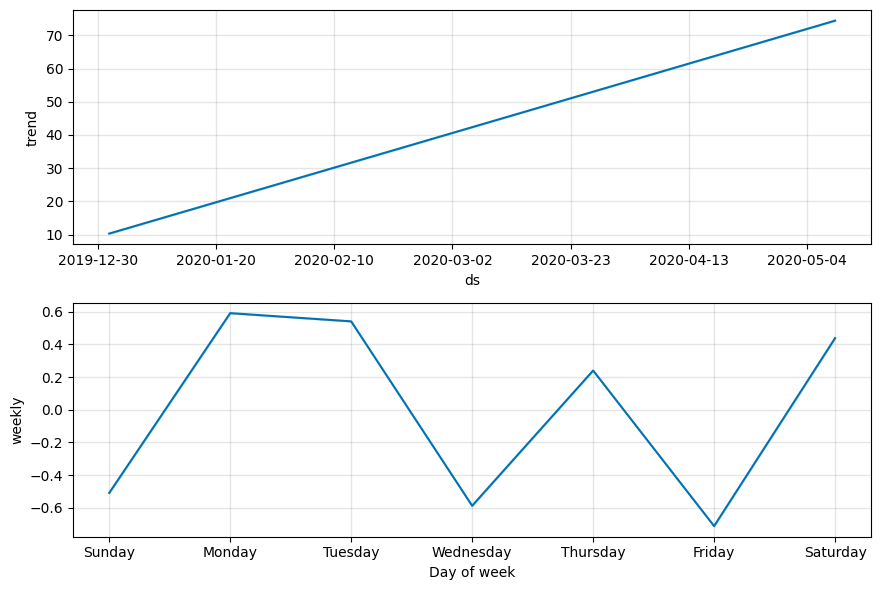

In [129]:

import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 날짜 범위 생성
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')

# 복잡한 패턴의 데이터 생성
np.random.seed(42)  # 재현성을 위한 시드 설정
data = {
    'ds': date_range,  # Prophet은 날짜 컬럼 이름이 반드시 'ds'여야 함
    'y': (
        10 +  # 기본 값
        0.5 * np.arange(100) +  # 선형 증가 추세
        5 * np.sin(2 * np.pi * np.arange(100) / 30) +  # 월간 주기적 패턴
        np.random.normal(0, 2, 100)  # 랜덤 노이즈 추가
    )
}

df = pd.DataFrame(data)

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(df)

# 미래 데이터프레임 생성 (예측할 기간 설정)
future = model.make_future_dataframe(periods=30)  # 30일 추가 예측
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

# 구성 요소(Trend, Seasonality 등) 시각화
fig2 = model.plot_components(forecast)
plt.show()

#### 1. **예측 결과 시각화 (`model.plot(forecast)`)**
- **내용**:
  - 실제 데이터(검은 점)와 예측 값(파란 선)을 시각화.
  - 예측 값의 불확실성 구간(밝은 파란색 영역)을 포함.
- **의미**:
  - Prophet이 학습한 데이터와 예측한 미래 데이터를 비교할 수 있음.
  - 불확실성 구간은 예측 값의 신뢰도(기본적으로 80% 또는 95% 신뢰 구간).

---

#### 2. **구성 요소 시각화 (`model.plot_components(forecast)`)**
- Prophet은 시계열 데이터를 **추세(Trend)**, **계절성(Seasonality)**, **휴일 효과(Holiday Effect)**로 분해하여 시각화.

##### (1) **추세(Trend)**
- **내용**:
  - 데이터의 장기적인 증가 또는 감소 경향을 보여줌.
- **의미**:
  - 데이터의 전반적인 방향성을 이해할 수 있음.
  - 예: 매출이 지속적으로 증가하거나 감소하는 패턴.

##### (2) **계절성(Seasonality)**
- **내용**:
  - 데이터의 주기적 패턴을 보여줌.
  - Prophet은 기본적으로 **연간 계절성**과 **주간 계절성**을 모델링.
- **의미**:
  - 데이터가 특정 주기(예: 주간, 월간, 연간)마다 반복되는 패턴을 이해할 수 있음.
  - 예: 주말에 매출이 증가하거나, 여름에 에너지 소비가 증가하는 패턴.

##### (3) **휴일 효과(Holiday Effect)** (옵션)
- **내용**:
  - 특정 휴일이 데이터에 미치는 영향을 보여줌.
  - 휴일 데이터를 추가한 경우에만 표시됨.
- **의미**:
  - 특정 이벤트(예: 블랙프라이데이, 크리스마스)가 데이터에 미치는 영향을 분석할 수 있음.

---

#### 3. **시각화 자료 활용**
- **예측 결과 확인**:
  - 예측 값이 실제 데이터와 얼마나 잘 맞는지 확인.
  - 불확실성 구간이 넓다면 모델의 신뢰도가 낮을 수 있음.
- **구성 요소 분석**:
  - 추세와 계절성을 분리하여 데이터의 주요 패턴을 이해.
  - 휴일 효과를 분석하여 특정 이벤트가 데이터에 미치는 영향을 파악.
